In [2]:
import pandas as pd
import sqlite3

In [3]:
df= pd.read_csv('Sales_Data.csv')

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [6]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [7]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [8]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [9]:
if 'order_date' in df.columns:
    df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)  # day first fix
    df['month'] = df['order_date'].dt.month
    df['year'] = df['order_date'].dt.year
df.dropna(subset=['sales'], inplace=True)
conn = sqlite3.connect('sales.db')  # create SQLite DB
df.to_sql('sales', conn, if_exists='replace', index=False)

print("Data cleaning complete and ready for SQL/Python analysis!")

Data cleaning complete and ready for SQL/Python analysis!


In [10]:

# SQL query as a Python string
query = """
SELECT postal_code,
       COUNT(*) AS num_orders,
       SUM(sales) AS total_sales,
       AVG(sales) AS avg_sales
FROM sales
GROUP BY postal_code
ORDER BY total_sales DESC
LIMIT 10;
"""

# Run the query using the existing connection
top_postal_sales = pd.read_sql(query, conn)
print(top_postal_sales)

   postal_code  num_orders  total_sales   avg_sales
0      10024.0         225    78534.044  349.040196
1      10035.0         253    75151.829  297.042802
2      10009.0         220    53225.076  241.932164
3      94122.0         195    49114.375  251.868590
4      10011.0         193    45551.598  236.018642
5      98105.0         165    41838.008  253.563685
6      98115.0         112    41160.908  367.508107
7      19134.0         160    39390.293  246.189331
8      32216.0          75    39133.328  521.777707
9      90049.0         150    37889.924  252.599493


In [11]:
import mataplotlib.pyplot as plt
# Visualization
plt.figure(figsize=(10,6))
plt.bar(top_postal_sales['postal_code'].astype(str), top_postal_sales['total_sales'], color='skyblue')
plt.xlabel('Postal Code')
plt.ylabel('Total Sales')
plt.title('Top 10 Postal Codes by Total Sales')
plt.xticks(rotation=45)
plt.show()

ModuleNotFoundError: No module named 'mataplotlib'

In [12]:
# SQL query to get top 10 highest sales transactions
query_top_sales = """
SELECT *
FROM sales
ORDER BY sales DESC
LIMIT 10;
"""

# Run the query
top_sales = pd.read_sql(query_top_sales, conn)
print(top_sales)


   row_id        order_id           order_date   ship_date       ship_mode  \
0    2698  CA-2015-145317  2015-03-18 00:00:00  23/03/2015  Standard Class   
1    6827  CA-2017-118689  2017-10-02 00:00:00  09/10/2017  Standard Class   
2    8154  CA-2018-140151  2018-03-23 00:00:00  25/03/2018     First Class   
3    2624  CA-2018-127180  2018-10-22 00:00:00  24/10/2018     First Class   
4    4191  CA-2018-166709  2018-11-17 00:00:00  22/11/2018  Standard Class   
5    9040  CA-2017-117121  2017-12-17 00:00:00  21/12/2017  Standard Class   
6    4099  CA-2015-116904  2015-09-23 00:00:00  28/09/2015  Standard Class   
7    4278  US-2017-107440  2017-04-16 00:00:00  20/04/2017  Standard Class   
8    8489  CA-2017-158841  2017-02-02 00:00:00  04/02/2017    Second Class   
9    6426  CA-2017-143714  2017-05-23 00:00:00  27/05/2017  Standard Class   

  customer_id       customer_name      segment        country           city  \
0    SM-20320         Sean Miller  Home Office  United States

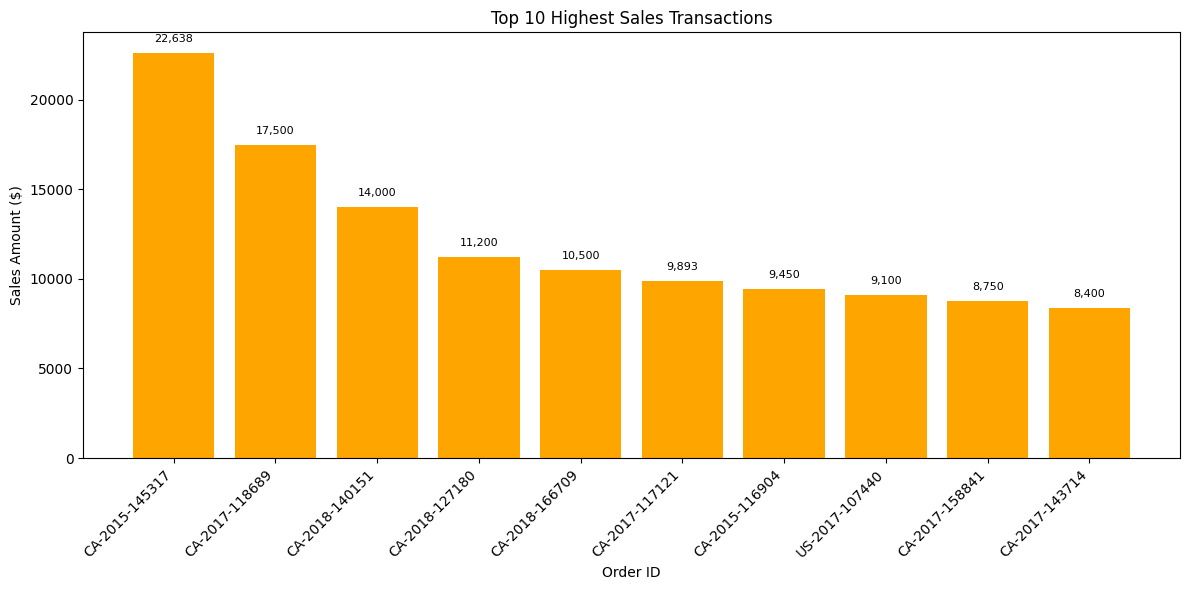

In [13]:
plt.figure(figsize=(12,6))
bars = plt.bar(top_sales['order_id'], top_sales['sales'], color='orange')

# Add sales labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 500, f'{yval:,.0f}', ha='center', va='bottom', fontsize=8)

plt.xlabel('Order ID')
plt.ylabel('Sales Amount ($)')
plt.title('Top 10 Highest Sales Transactions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [14]:
query = """
SELECT category,
       SUM(sales) AS total_sales,
       AVG(sales) AS avg_sales_per_order,
       COUNT(*) AS num_orders
FROM sales
GROUP BY category
ORDER BY total_sales DESC;
"""
category_sales = pd.read_sql(query, conn)
print(category_sales)


          category  total_sales  avg_sales_per_order  num_orders
0       Technology  827455.8730           456.401474        1813
1        Furniture  728658.5757           350.653790        2078
2  Office Supplies  705422.3340           119.381001        5909


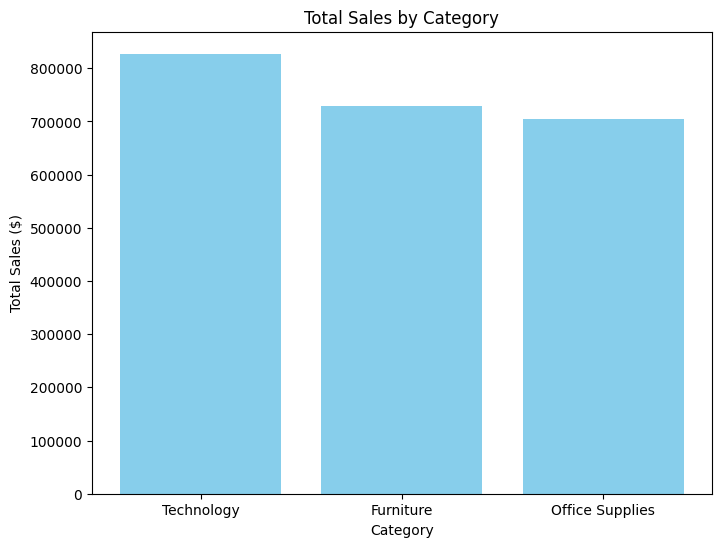

In [15]:
plt.figure(figsize=(8,6))

plt.bar(category_sales['category'], category_sales['total_sales'], 
        color='skyblue')

plt.xlabel('Category')
plt.ylabel('Total Sales ($)')
plt.title('Total Sales by Category')
plt.show()


In [16]:
# query = """
# SELECT "Sub_Category",
#        SUM(Sales) AS total_sales,
#        AVG(Sales) AS avg_sales_per_order,
#        COUNT(*) AS num_orders
# FROM sales
# GROUP BY "Sub_Category"
# ORDER BY total_sales DESC;
# """
# subcategory_sales = pd.read_sql(query, conn)
# print(subcategory_sales)


In [17]:
# pd.read_sql("PRAGMA table_info(sales);", conn)


In [18]:
query = """
SELECT "sub-category" AS sub_category,
       SUM(sales) AS total_sales,
       AVG(sales) AS avg_sales_per_order,
       COUNT(*) AS num_orders
FROM sales
GROUP BY "sub-category"
ORDER BY total_sales DESC;
"""

subcategory_sales = pd.read_sql(query, conn)
print(subcategory_sales)


   sub_category  total_sales  avg_sales_per_order  num_orders
0        Phones  327782.4480           374.180877         876
1        Chairs  322822.7310           531.833165         607
2       Storage  219343.3920           263.633885         832
3        Tables  202810.6280           645.893720         314
4       Binders  200028.7850           134.067550        1492
5      Machines  189238.6310          1645.553313         115
6   Accessories  164186.7000           217.178175         756
7       Copiers  146248.0940          2215.880212          66
8     Bookcases  113813.1987           503.598224         226
9    Appliances  104618.4030           227.926804         459
10  Furnishings   89212.0180            95.823865         931
11        Paper   76828.3040            57.420257        1338
12     Supplies   46420.3080           252.284283         184
13          Art   26705.4100            34.019631         785
14    Envelopes   16128.0460            65.032444         248
15      

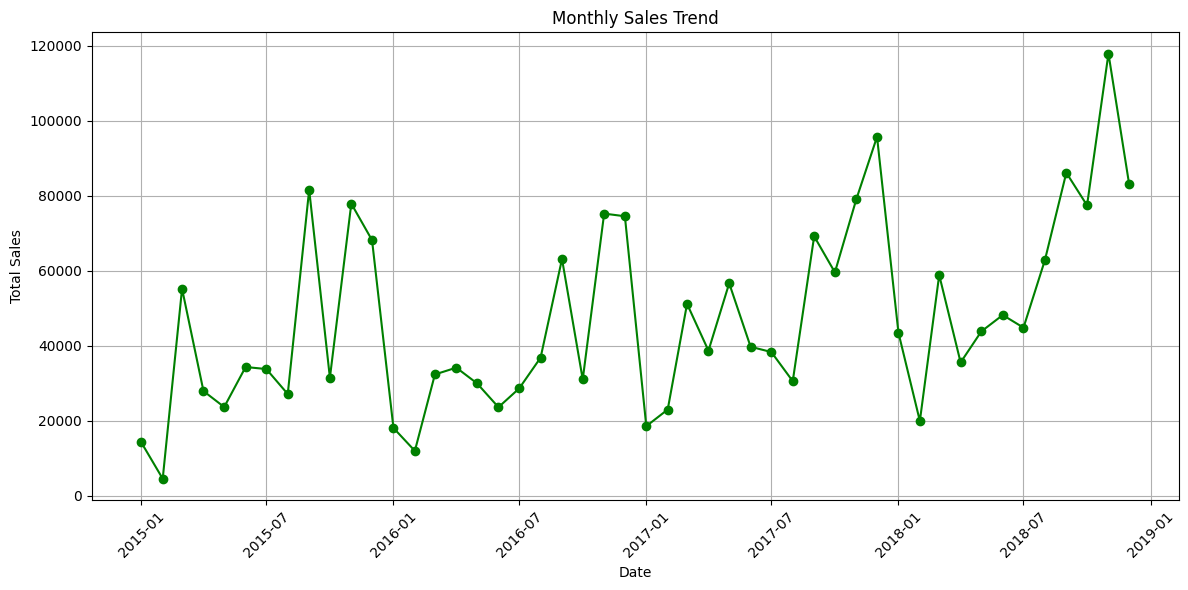

In [19]:
# Run SQL query
monthly_sales = pd.read_sql("""
SELECT year,
       month,
       SUM(sales) AS total_sales,
       AVG(sales) AS avg_sales
FROM sales
GROUP BY year, month
ORDER BY year, month;
""", conn)

# Combine year and month into a single datetime for plotting
monthly_sales['date'] = pd.to_datetime(monthly_sales[['year', 'month']].assign(day=1))

# Plot total sales trend
plt.figure(figsize=(12,6))
plt.plot(monthly_sales['date'], monthly_sales['total_sales'], marker='o', linestyle='-', color='green')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

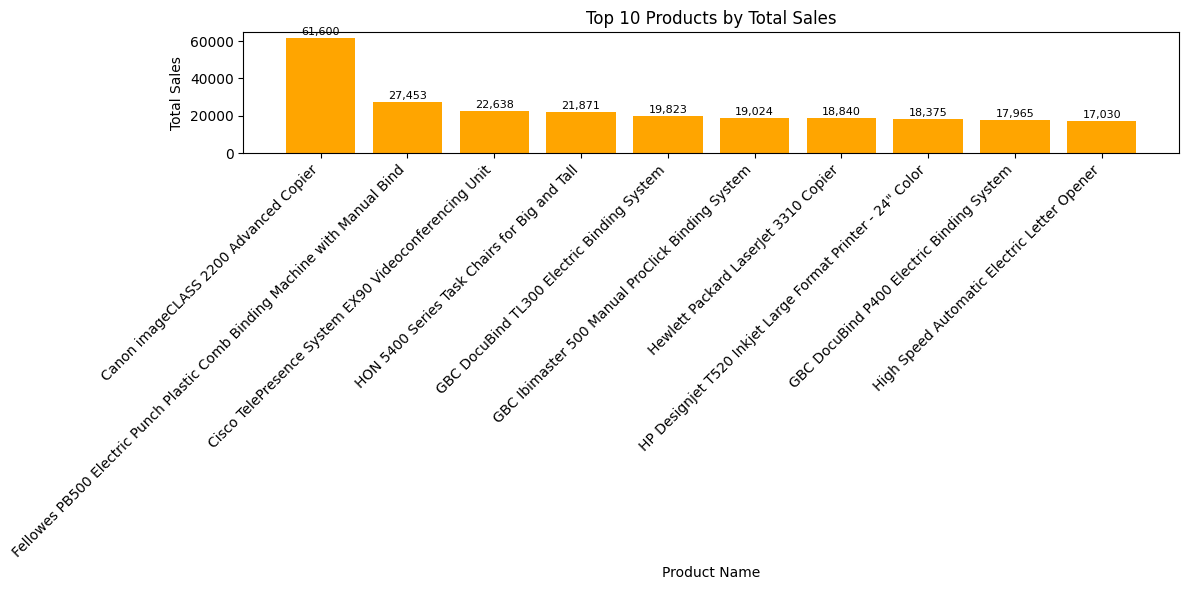

In [20]:
top_products = pd.read_sql("""
SELECT product_name,
       SUM(sales) AS total_sales,
       AVG(sales) AS avg_sales_per_order,
       COUNT(*) AS num_orders
FROM sales
GROUP BY product_name
ORDER BY total_sales DESC
LIMIT 10;
""", conn)

# Plot
plt.figure(figsize=(12,6))
bars = plt.bar(top_products['product_name'], top_products['total_sales'], color='orange')

# Add labels on top
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 500, f'{yval:,.0f}', ha='center', va='bottom', fontsize=8)

plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.title('Top 10 Products by Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [21]:
monthly_sales = pd.read_sql("""
SELECT year,
       month,
       SUM(sales) AS total_sales,
       AVG(sales) AS avg_sales
FROM sales
GROUP BY year, month
ORDER BY year, month;
""", conn)

print(monthly_sales)


    year  month  total_sales   avg_sales
0   2015      1   14205.7070  184.489701
1   2015      2    4519.8920   98.258522
2   2015      3   55205.7970  358.479201
3   2015      4   27906.8550  214.668115
4   2015      5   23644.3030  195.407463
5   2015      6   34322.9356  262.007142
6   2015      7   33781.5430  237.898190
7   2015      8   27117.5365  185.736551
8   2015      9   81623.5268  305.706093
9   2015     10   31453.3930  197.820082
10  2015     11   77907.6607  254.600198
11  2015     12   68167.0585  248.784885
12  2016      1   18066.9576  316.964168
13  2016      2   11951.4110  186.740797
14  2016      3   32339.3184  252.650925
15  2016      4   34154.4685  214.807978
16  2016      5   29959.5305  209.507206
17  2016      6   23599.3740  182.940884
18  2016      7   28608.2590  210.354846
19  2016      8   36818.3422  233.027482
20  2016      9   63133.6060  221.521425
21  2016     10   31011.7375  189.095960
22  2016     11   75249.3995  234.421805
23  2016     12 

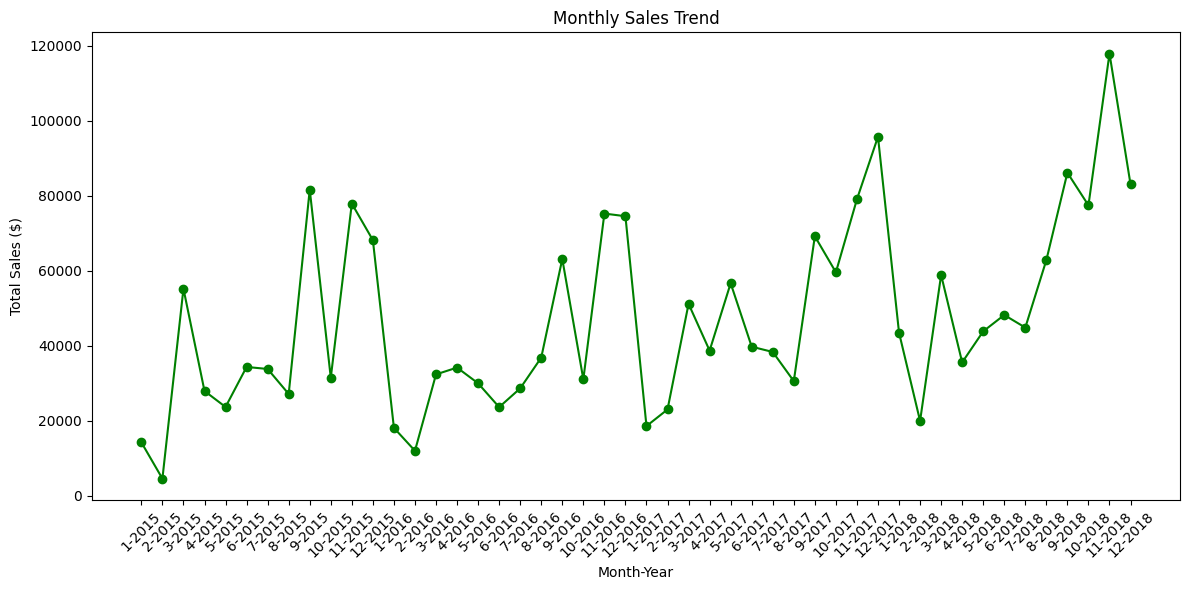

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# Connect to your SQLite database
conn = sqlite3.connect('sales.db')

# Step 1: Monthly sales aggregation
monthly_sales = pd.read_sql("""
SELECT year,
       month,
       SUM(sales) AS total_sales,
       AVG(sales) AS avg_sales
FROM sales
GROUP BY year, month
ORDER BY year, month;
""", conn)

# Step 2: Line chart for monthly sales trend
plt.figure(figsize=(12,6))
plt.plot(monthly_sales['month'].astype(str) + '-' + monthly_sales['year'].astype(str), 
         monthly_sales['total_sales'], marker='o', color='green')
plt.xticks(rotation=45)
plt.xlabel('Month-Year')
plt.ylabel('Total Sales ($)')
plt.title('Monthly Sales Trend')
plt.tight_layout()
plt.show()



In [25]:
# Top 10 postal codes by total sales
top_postal_sales.to_csv('top_postal_sales.csv', index=False)

# Top categories by sales
category_sales.to_csv('category_sales.csv', index=False)

# Top sub-categories by sales
subcategory_sales.to_csv('subcategory_sales.csv', index=False)

# Monthly sales trend
monthly_sales.to_csv('monthly_sales.csv', index=False)

# Full sales data (optional, if you want more detailed dashboard)
df.to_csv('all_sales_data.csv', index=False)


In [26]:
import pandas as pd
import sqlite3

# Connect to the SQLite DB
conn = sqlite3.connect('sales.db')

# 1️⃣ Monthly Sales Trend
monthly_sales_query = """
SELECT year, month, SUM(sales) AS monthly_sales
FROM sales
GROUP BY year, month
ORDER BY year, month;
"""
monthly_sales = pd.read_sql(monthly_sales_query, conn)

# 2️⃣ Top Products
top_products_query = """
SELECT product_name, SUM(sales) AS total_sales, COUNT(*) AS num_orders
FROM sales
GROUP BY product_name
ORDER BY total_sales DESC
LIMIT 10;
"""
top_products = pd.read_sql(top_products_query, conn)

# 3️⃣ Top Customers
top_customers_query = """
SELECT customer_name, SUM(sales) AS total_sales, COUNT(*) AS num_orders
FROM sales
GROUP BY customer_name
ORDER BY total_sales DESC
LIMIT 10;
"""
top_customers = pd.read_sql(top_customers_query, conn)

# 4️⃣ Segment Analysis
segment_sales_query = """
SELECT segment, SUM(sales) AS total_sales, AVG(sales) AS avg_sales
FROM sales
GROUP BY segment
ORDER BY total_sales DESC;
"""
segment_sales = pd.read_sql(segment_sales_query, conn)

# 5️⃣ Region / State Analysis
region_sales_query = """
SELECT region, SUM(sales) AS total_sales
FROM sales
GROUP BY region
ORDER BY total_sales DESC;
"""
region_sales = pd.read_sql(region_sales_query, conn)

state_sales_query = """
SELECT state, SUM(sales) AS total_sales
FROM sales
GROUP BY state
ORDER BY total_sales DESC;
"""
state_sales = pd.read_sql(state_sales_query, conn)

# 6️⃣ Ship Mode Analysis
shipmode_sales_query = """
SELECT ship_mode, SUM(sales) AS total_sales, COUNT(*) AS num_orders
FROM sales
GROUP BY ship_mode
ORDER BY total_sales DESC;
"""
shipmode_sales = pd.read_sql(shipmode_sales_query, conn)

# Optional: Save all dataframes to CSV for Power BI
monthly_sales.to_csv('monthly_sales.csv', index=False)
top_products.to_csv('top_products.csv', index=False)
top_customers.to_csv('top_customers.csv', index=False)
segment_sales.to_csv('segment_sales.csv', index=False)
region_sales.to_csv('region_sales.csv', index=False)
state_sales.to_csv('state_sales.csv', index=False)
shipmode_sales.to_csv('shipmode_sales.csv', index=False)

print("✅ All aggregations done and CSVs ready for Power BI!")


✅ All aggregations done and CSVs ready for Power BI!
